1. Your views about the problem statement?

Answer:

This problem statement about creating an ML model for rainfall prediction using different classification methods. The expert will preprocess data, apply Decision Trees and Ensemble methods, compare their accuracy, evaluate performance using a confusion matrix,then we have to choose the best model, analyze its strengths, and propose strategies for improving accuracy.

2. What will be your approach to solving this task?

Answer:

- Fristly we will clearly understand the problem statement
- Then, explore the dataset to understand its structure, features, and any initial insights.
- After that we will import all the required library to perform EDA like    
 - how to handle missing values (remove, impute) for each feature if present.
 - Identify outliers and decide whether to remove or transform them based on their impact on the model.
 - Convert categorical variables into numerical representations because ML model does not understand categorical variables
 - Remove Unnecessary columns from dataset which are not significant for the model
 - Scale numerical features to a common range to prevent one feature from dominating others.
 - create graph and chart to observe the trend of the data.  

- After performing above steps we will split the dataset into training and testing subsets.  
- Then we will choose Classification models for the task like Logistic Regression,Naive Bayes, KNN, Decision tree, Random forest etc and compare which is giving highest accuracy.

3. What were the available ML model options you had to perform this task?

Answer:

I will be experimenting with below algorithims:

1.Logistic Regression

2.Naive Bayes

3.K-Nearest Neighbours

4.Decision Tree Classifier

5.Random Forest Classifier

6.GridSearchCV

- using KNN
- using Decision Tree
- using Random Forest

7.Bagging

- using Logistic Regression
- using Naive Bayes
- using KNN
- using Decision Tree
- using Random Forest

8.Gradient Boosting   

9.Ada Boost   

10.XG Boost   


4. Which model’s performance is best and what could be the possible reason for that?

Answer:
    
Ada Boost is performimg best among all other models beacuse:-
- AdaBoost is a good contender for precise prediction in demanding situations like weather forecasting because of its capacity to learn from errors iteratively and concentrate on difficult situations.
- AdaBoost is designed to improve the performance of models that perform slightly better than random guessing.
- AdaBoost's iterative approach can help avoid overfitting because it focuses on reducing errors.
- Weather data can have noise due to various factors, and AdaBoost's ensemble approach can help filter out some of this noise.
-  AdaBoost tends to give higher weight to features that are informative for prediction
-  In weather prediction, some conditions might be more challenging to predict than others. AdaBoost's weighted training can improve accuracy by focusing on those challenging cases.


5. What steps can you take to improve this selected model’s performance even further?

Answer: I will be performing below mentioned steps to enhance model's performance:-

- I will be experimenting with different hyperparameters of the AdaBoost algorithm, such as the number of estimators, learning rate, and base estimator type.
- Also we can utilize techniques like grid search or random search to find the optimal combination of hyperparameters.
- We can aslo address any remaining data quality issues, outliers that might affect model performance.
- Also we can implement cross-validation techniques, such as k-fold cross-validation, to assess the model's performance more accurately
- If the dataset has a class imbalance,we will apply techniques like oversampling or undersampling to balance the classes and improve model performance.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Datasets
df=pd.read_excel("sydney_rain_prediction.xlsx")

In [3]:
# to see top 5 data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# Exploratory Data Analysis
### Before training the model, we need to observe and analyse the data.

In [4]:
# size of the dataset
df.shape

(3337, 17)

In [5]:
# checking the type of dataset
df.dtypes

Date            datetime64[ns]
Location                object
MinTemp                float64
MaxTemp                float64
Rainfall               float64
Evaporation            float64
Sunshine               float64
Humidity9am            float64
Humidity3pm            float64
Pressure9am            float64
Pressure3pm            float64
Cloud9am               float64
Cloud3pm               float64
Temp9am                float64
Temp3pm                float64
RainToday               object
RainTomorrow            object
dtype: object

In [6]:
# information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [7]:
# checking null values
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

Conclusion:  
Each column have null values except Date, Location and RainTomorrow. Further we will deal with these null values.

### Imputating missing values in the dataset For Categorical data

In [8]:
# to check the count of yes and no
df['RainToday'].value_counts()

No     2465
Yes     866
Name: RainToday, dtype: int64

In [9]:
#Imputing missing values in dataset with mode imputation.
from sklearn.impute import SimpleImputer
sim=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [10]:
df['RainToday']=sim.fit_transform(df[['RainToday']])

In [11]:
# to check the count of yes and no
df['RainToday'].value_counts()

No     2471
Yes     866
Name: RainToday, dtype: int64

In [12]:
df['RainToday'].isnull().sum()

0

### Imputating missing values in the dataset For Numeric data

In [13]:
# to check missing value
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         0
RainTomorrow      0
dtype: int64

#### Imputating missing values using mean

In [14]:
mean=df.iloc[:,2:15].fillna(df.iloc[:,2:15].mean())

In [15]:
mean

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0


#### Imputating missing values using median

In [16]:
median=df.iloc[:,2:15].fillna(df.iloc[:,2:15].median())
median

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9
4,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0


C:\Users\Navin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Navin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Navin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

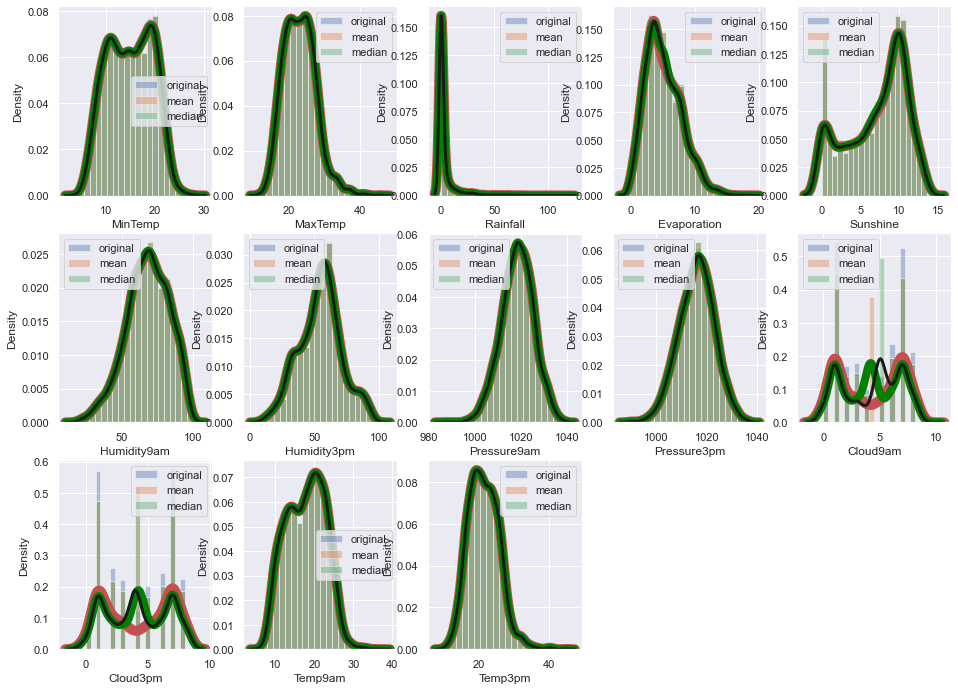

In [17]:
 # plotting the  displot graph and considering original dataset, dataset with mean values and dataset with median values
plt.figure(figsize=(16,16))
sns.set()
for i,var in enumerate(df.iloc[:,2:15]):
    plt.subplot(4,5,i+1)
    sns.distplot(df.iloc[:,2:15][var],bins=20,kde_kws={'color':"r",'linewidth':10},label="original")
    sns.distplot(mean[var],bins=20,kde_kws={'linewidth':8,"color":"green"},label="mean")
    sns.distplot(median[var],bins=20,kde_kws={'linewidth':3,"color":"k"},label="median")
    plt.legend()

Conclusion:  
we can observe from above graph,that distribution of data in both mean and median are not varying much. But I am considering median data.

In [18]:
# Fill missing value using Median
df.iloc[:,2:15]=df.iloc[:,2:15].fillna(df.iloc[:,2:15].median())

In [19]:
# to check null value
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [20]:
# to see top 5 data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [21]:
# to see bottom 5 data
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3332,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
3333,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
3334,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
3335,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No
3336,2017-06-25,Sydney,7.6,19.3,0.0,3.4,9.4,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No


In [22]:
# Converting categorical data into numerical
df = pd.get_dummies(df,columns = ["RainToday",'RainTomorrow'],drop_first=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [23]:
# Detalied dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865088,23.002218,3.324243,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054,0.259515,0.259215
std,4.551593,4.493293,9.887277,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


Conclusion:  
From the Above, We can clearly observe that Rainfall has some outlier. So we will have to deal with that outlier

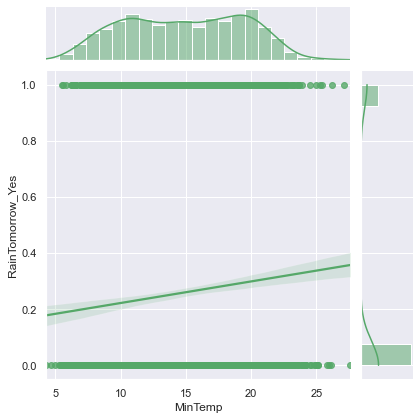

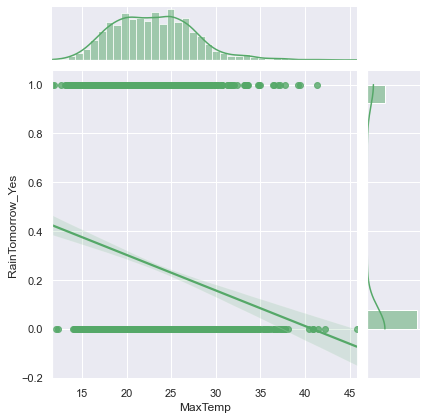

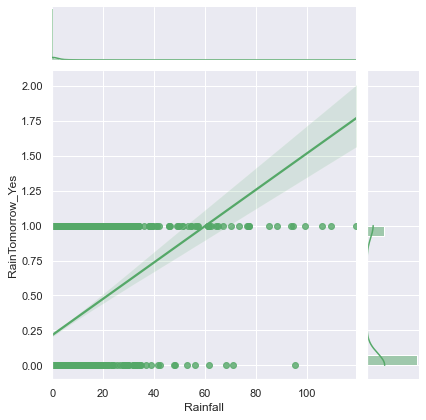

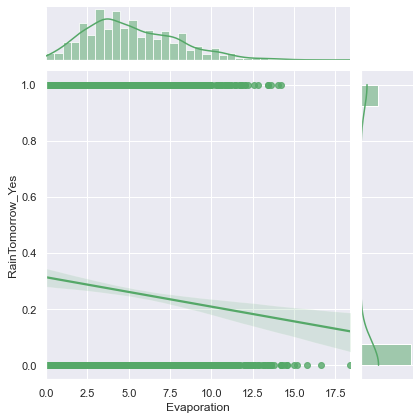

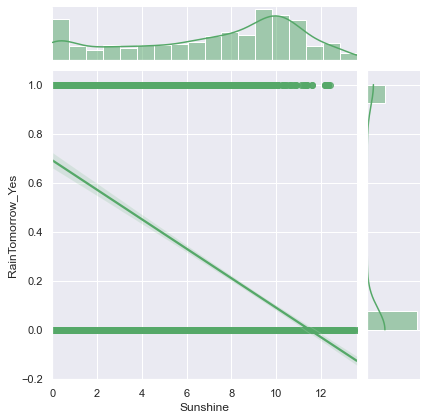

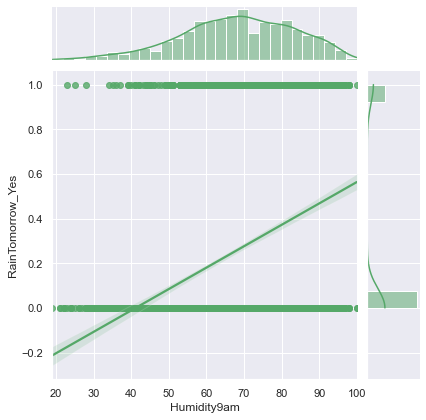

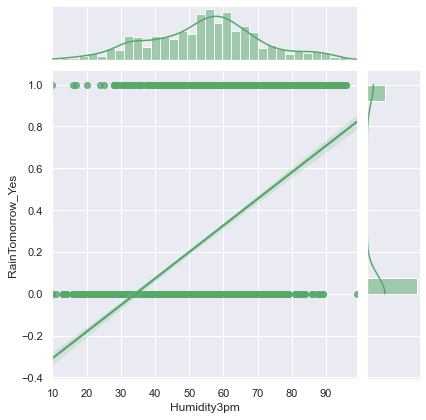

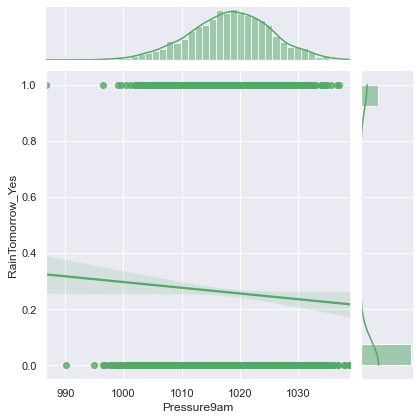

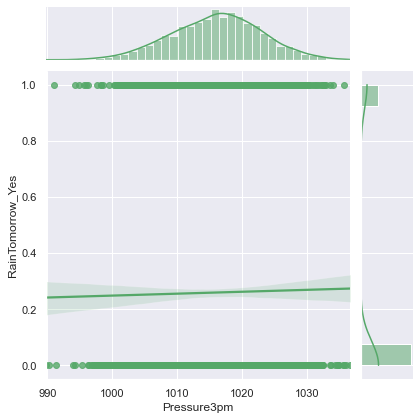

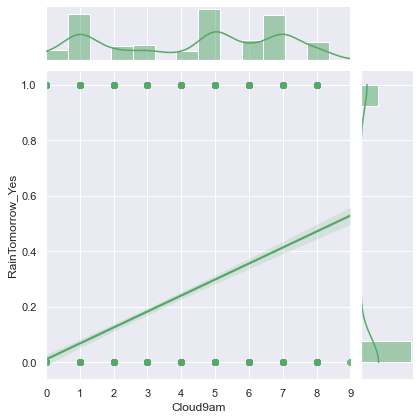

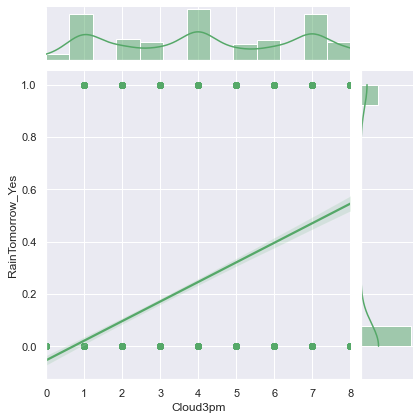

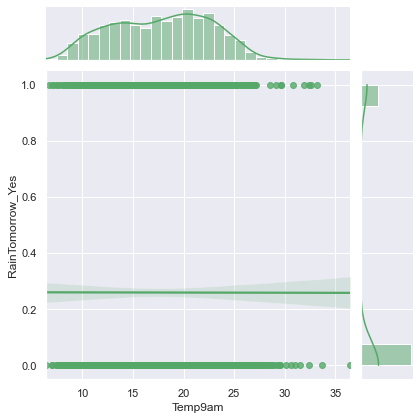

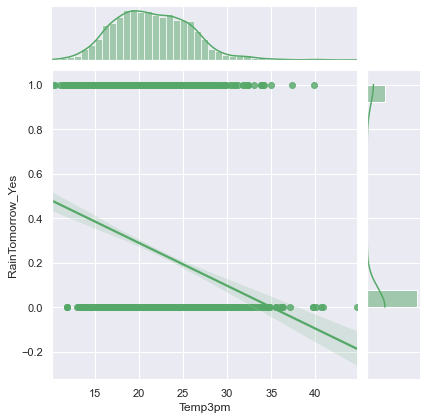

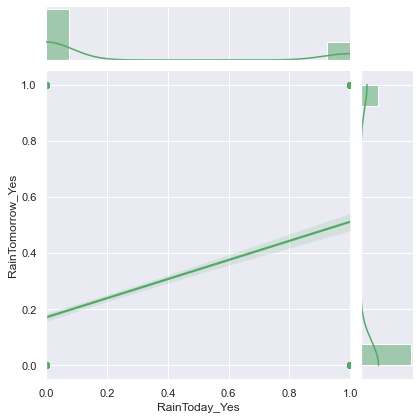

In [24]:
# Creating scatterplot to observe the trend of the data
for i, var in enumerate(df.iloc[:,2:]):
    if var=='RainTomorrow_Yes':
        continue
    sns.jointplot(x=var,y='RainTomorrow_Yes',data=df,kind='reg',color='g')

#### Deal with outlier

In [25]:
# 99th percentile of Rainfall data
uv=np.percentile(df.Rainfall,[99])[0]
uv

52.29599999999982

In [26]:
# Data above 99th percentile of Railfall
df[(df.Rainfall>uv)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
218,2008-09-06,Sydney,11.8,14.2,62.2,4.8,0.0,92.0,88.0,1014.8,1013.1,8.0,8.0,13.0,12.3,1,1
633,2009-10-26,Sydney,14.4,17.0,73.2,4.8,0.0,91.0,60.0,1023.7,1025.3,8.0,8.0,14.7,16.6,1,1
737,2010-02-07,Sydney,20.2,25.0,77.4,7.4,0.2,95.0,86.0,1021.6,1020.8,7.0,8.0,21.1,23.8,1,1
743,2010-02-13,Sydney,21.4,25.5,70.0,9.4,0.3,92.0,80.0,1011.9,1010.2,8.0,8.0,22.1,25.2,1,1
855,2010-06-05,Sydney,12.5,20.5,61.4,1.0,4.4,80.0,67.0,1014.2,1012.0,5.0,7.0,13.5,17.4,1,0
1140,2011-03-20,Sydney,18.8,23.5,99.4,4.8,3.3,92.0,81.0,1012.4,1010.1,5.0,4.0,19.4,22.2,1,1
1182,2011-05-31,Sydney,13.9,19.9,65.2,4.8,0.7,81.0,62.0,1019.5,1019.3,5.0,4.0,17.9,19.6,1,1
1232,2011-07-20,Sydney,8.7,18.5,76.8,4.8,1.6,91.0,83.0,1012.7,1013.5,5.0,4.0,14.3,15.0,1,1
1234,2011-07-22,Sydney,11.3,13.9,88.2,4.8,0.0,88.0,95.0,1018.3,1018.0,5.0,4.0,13.1,11.5,1,1


In [27]:
df.Rainfall[(df.Rainfall> 2*uv)] = 2*uv

<ipython-input-27-630512d6b744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall> 2*uv)] = 2*uv


In [28]:
# Detalied dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865088,23.002218,3.318003,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054,0.259515,0.259215
std,4.551593,4.493293,9.819411,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,104.592000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


## Correlation Matrix

<ipython-input-29-377e1aa5830b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


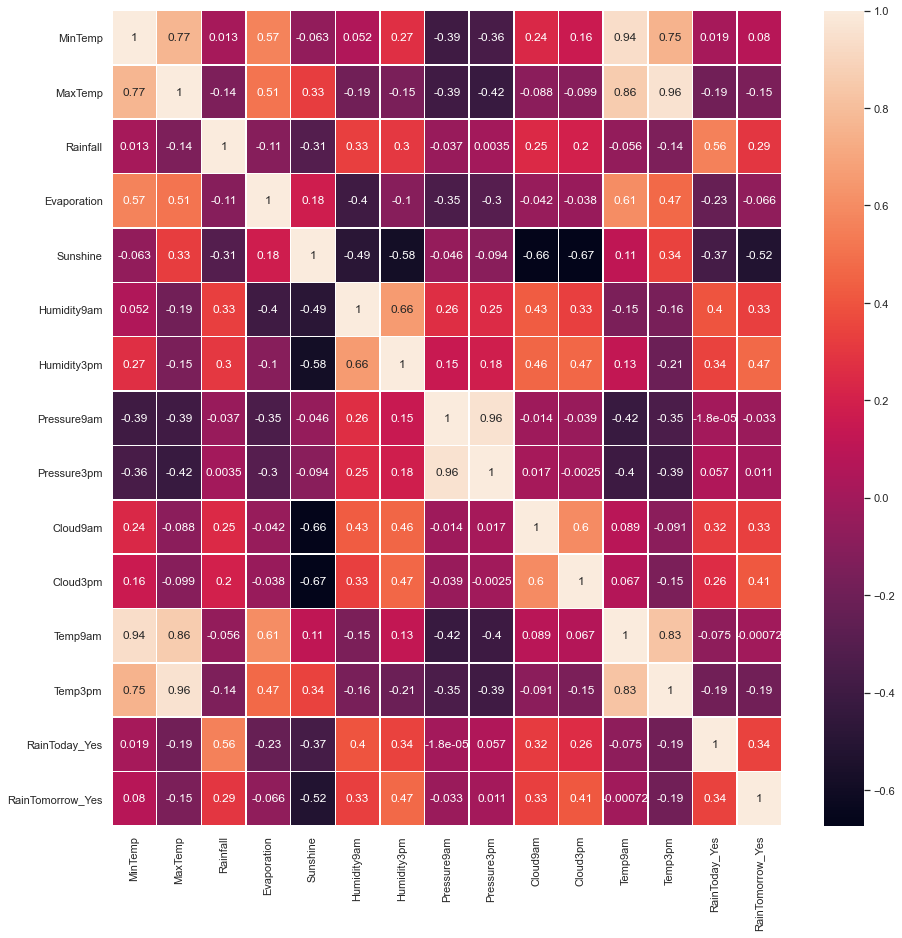

In [29]:
#  correlation matrix of dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5)

<ipython-input-30-6f9493f4982c>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('RainTomorrow_Yes', axis=1).corrwith(df.RainTomorrow_Yes).plot(kind='bar', figsize=(12, 8), grid=True,color='r',


<AxesSubplot:title={'center':'Correlation with target'}>

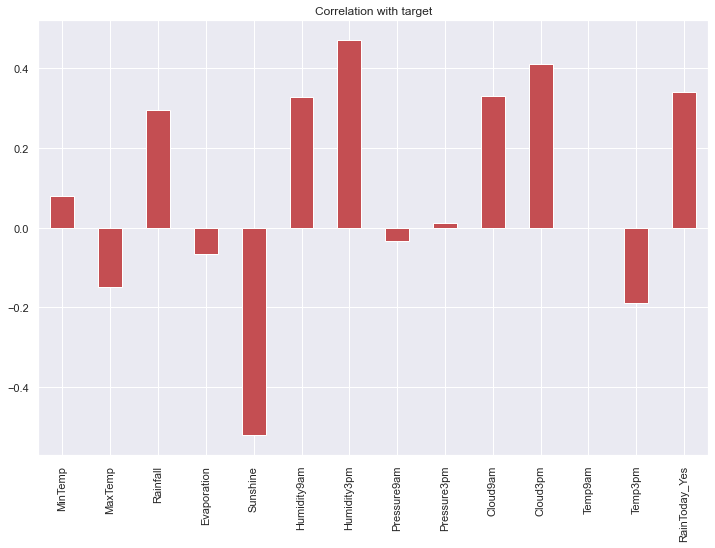

In [30]:
# Co-realtion with Depended Varibale
df.drop('RainTomorrow_Yes', axis=1).corrwith(df.RainTomorrow_Yes).plot(kind='bar', figsize=(12, 8), grid=True,color='r',
                                                   title="Correlation with target")

In [31]:
#  the correlation coefficients are calculated for each feature with respect to the dependent variable.
correlations = df.corr()['RainTomorrow_Yes'].abs().sort_values(ascending=False)
correlations

<ipython-input-31-7b59a62cf914>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['RainTomorrow_Yes'].abs().sort_values(ascending=False)


RainTomorrow_Yes    1.000000
Sunshine            0.521357
Humidity3pm         0.471224
Cloud3pm            0.411826
RainToday_Yes       0.340894
Cloud9am            0.331352
Humidity9am         0.328952
Rainfall            0.294631
Temp3pm             0.188912
MaxTemp             0.149253
MinTemp             0.079958
Evaporation         0.065904
Pressure9am         0.032519
Pressure3pm         0.010951
Temp9am             0.000723
Name: RainTomorrow_Yes, dtype: float64

In [32]:
# drop column Date and Location from dataset
df.drop(['Date','Location'],axis=1,inplace=True)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


In [33]:
# Size of the Dataset
df.shape

(3337, 15)

## Forward Elimination

In [34]:
#Importing the library:
import statsmodels.api as sm

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [35]:
# Start forward elimination
selected_features = []
remaining_features = df.drop('RainTomorrow_Yes', axis=1).columns.tolist()

while remaining_features:
    best_feature = None
    best_model = None
    best_pvalue = float('inf')
    
    for feature in remaining_features:
        X = sm.add_constant(df[selected_features + [feature]])
        y = df['RainTomorrow_Yes']
        model = sm.OLS(y, X).fit()
        pvalue = model.pvalues[feature]
        
        if pvalue < best_pvalue:
            best_feature = feature
            best_model = model
            best_pvalue = pvalue
    
    if best_pvalue < 0.05:  # Significance threshold
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break

# Print the selected features and the final model summary
print("Selected Features:", selected_features)
print(best_model.summary())

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

Selected Features: ['Sunshine', 'Humidity3pm', 'RainToday_Yes', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Rainfall', 'MinTemp', 'Temp9am', 'Evaporation', 'Pressure3pm', 'MaxTemp']
                            OLS Regression Results                            
Dep. Variable:       RainTomorrow_Yes   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     142.8
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          3.57e-308
Time:                        17:29:47   Log-Likelihood:                -1241.2
No. Observations:                3337   AIC:                             2510.
Df Residuals:                    3323   BIC:                             2596.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std 

C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Navin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWa

In [36]:
# Dropping column Humidity9am and Temp3pm
df.drop(['Humidity9am','Temp3pm'],axis=1,inplace=True)

In [37]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,84.0,1017.6,1017.4,8.0,8.0,20.7,1,1
1,19.5,25.6,6.0,3.4,2.7,73.0,1017.9,1016.4,7.0,7.0,22.4,1,1
2,21.6,24.5,6.6,2.4,0.1,86.0,1016.7,1015.6,7.0,8.0,23.5,1,1
3,20.2,22.8,18.8,2.2,0.0,90.0,1014.2,1011.8,8.0,8.0,21.4,1,1
4,19.7,25.7,77.4,4.8,0.0,74.0,1008.3,1004.8,8.0,8.0,22.5,1,1


### Spliting the dataset

In [38]:
# spliting the dataset into features(independend variables) and target(dependent variables)
X=df.drop('RainTomorrow_Yes',axis=1)
y=df['RainTomorrow_Yes']

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# Size of the train and test dataset
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 12) (668, 12) (2669,) (668,)


# Model Building
I will be experimenting with below algorithims:  

1.Logistic Regression 

2.Naive Bayes

3.K-Nearest Neighbours 

4.Decision Tree Classifier

5.Random Forest Classifier

6.GridSearchCV    

- using KNN
- using Decision Tree
- using Random Forest

7.Bagging

- using Logistic Regression
- using Naive Bayes
- using KNN
- using Decision Tree
- using Random Forest

8.Gradient Boosting

9.Ada Boost

10.XG Boost

## Logistic Regression

In [41]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [42]:
# Predicting the Test set results
yp_pred = logmodel.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print()
print("-------Confusion Matrix----")
print(confusion_matrix(y_test,yp_pred))
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,yp_pred))


-------Confusion Matrix----
[[476  34]
 [ 76  82]]

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 476  34
1                  76  82


In [44]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Logistic regression: ',accuracy_score(y_test,yp_pred)*100)

Accuracy in case of  Logistic regression:  83.53293413173652


## Naive Bayes

In [45]:
# Fitting Naive bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [46]:
# Predicting the Test set results
yp_pred_bayes = model.predict(X_test)

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("-------Confusion Matrix----")
print(confusion_matrix(y_test,yp_pred_bayes))
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,yp_pred_bayes))

-------Confusion Matrix----
[[436  74]
 [ 59  99]]

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 436  74
1                  59  99


In [48]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Naive bayes: ',accuracy_score(y_test,yp_pred_bayes)*100)

Accuracy in case of  Naive bayes:  80.08982035928143


## K-Nearest Neighbours

In [49]:
# Create a KNN classifier with k=7 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=7)

In [50]:
# Fitting KNN to the Training set
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
# Make predictions on the test data
yp_pred_knn = knn_classifier.predict(X_test)

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("-------Confusion Matrix----")
print(confusion_matrix(y_test,yp_pred_knn))
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,yp_pred_knn))

-------Confusion Matrix----
[[470  40]
 [ 78  80]]

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 470  40
1                  78  80


In [53]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  KNN: ',accuracy_score(y_test,yp_pred_knn)*100)

Accuracy in case of  KNN:  82.33532934131736


#### KNN using Standard Scaler

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias.

So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [54]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train)

In [55]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s= scaler.transform(X_test)

In [56]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=7)
clf_knn_1.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
# Make predictions on the test data
y_pred_knn = clf_knn_1.predict(X_test_s)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("-------Confusion Matrix----")
print(confusion_matrix(y_test,y_pred_knn))
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_knn))

-------Confusion Matrix----
[[464  46]
 [ 79  79]]

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 464  46
1                  79  79


In [59]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  KNN using StandardScaler: ',accuracy_score(y_test,y_pred_knn)*100)

Accuracy in case of  KNN using StandardScaler:  81.2874251497006


## Decision Tree Classifier

In [60]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf=7)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)

In [61]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print()
print("---Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred))


---Confusion Matrix
[[485  25]
 [ 87  71]]

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 485  25
1                  87  71


In [63]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  DecisionTreeClassifier: ',accuracy_score(y_test,y_pred)*100)

Accuracy in case of  DecisionTreeClassifier:  83.23353293413174


In [64]:
# Decision Tree visualization-----------------
from sklearn import tree

[Text(3502.403846153846, 5536.666666666667, 'Humidity3pm <= 71.5\nentropy = 0.834\nsamples = 2669\nvalue = [1962, 707]\nclass = 0'),
 Text(1907.6923076923076, 4530.0, 'Sunshine <= 8.05\nentropy = 0.677\nsamples = 2305\nvalue = [1893, 412]\nclass = 0'),
 Text(953.8461538461538, 3523.3333333333335, 'Rainfall <= 1.9\nentropy = 0.912\nsamples = 955\nvalue = [643, 312]\nclass = 0'),
 Text(476.9230769230769, 2516.666666666667, 'Cloud3pm <= 2.5\nentropy = 0.823\nsamples = 684\nvalue = [508, 176]\nclass = 0'),
 Text(238.46153846153845, 1510.0, 'Evaporation <= 6.6\nentropy = 0.376\nsamples = 55\nvalue = [51, 4]\nclass = 0'),
 Text(119.23076923076923, 503.33333333333394, 'entropy = 0.156\nsamples = 44\nvalue = [43, 1]\nclass = 0'),
 Text(357.6923076923077, 503.33333333333394, 'entropy = 0.845\nsamples = 11\nvalue = [8, 3]\nclass = 0'),
 Text(715.3846153846154, 1510.0, 'Pressure9am <= 1014.45\nentropy = 0.846\nsamples = 629\nvalue = [457, 172]\nclass = 0'),
 Text(596.1538461538462, 503.3333333333

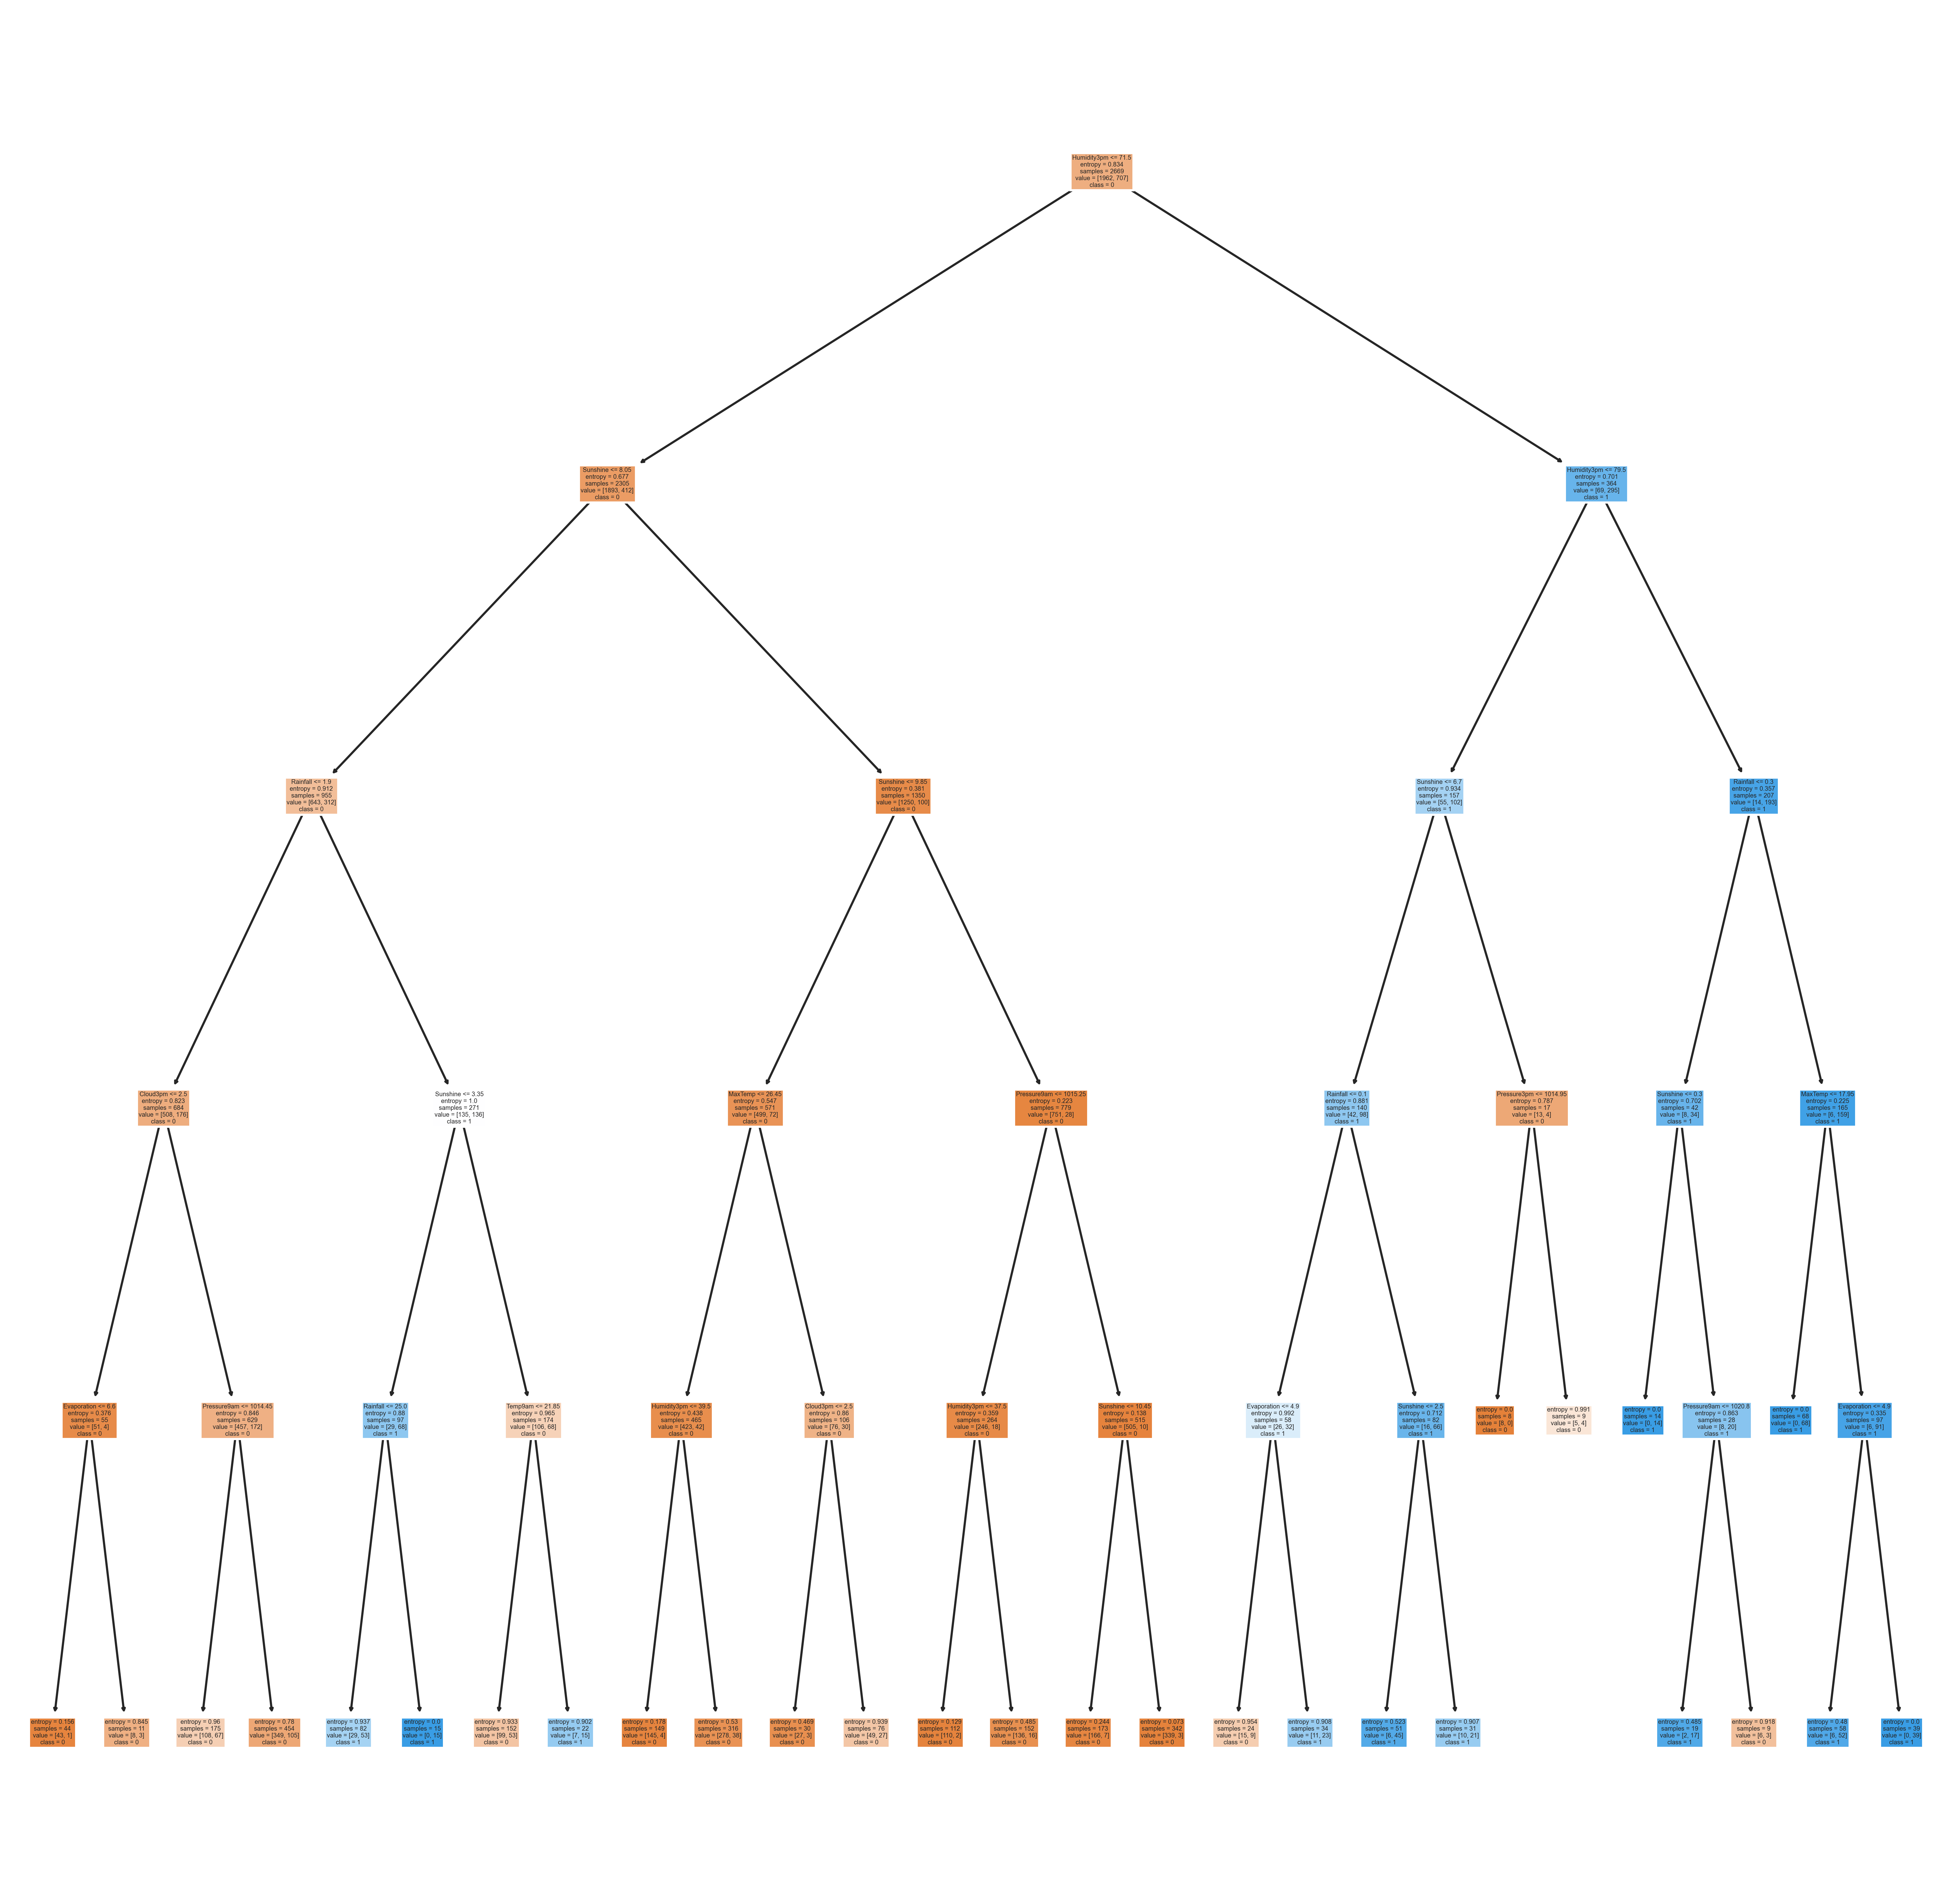

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=500)
#The above line is used to set the pixels of the Decision Trees nodes so that
#the content mentioned in each node of Decision tree is visible.
cn=['0','1']
tree.plot_tree(classifier,feature_names=X_train.columns,class_names=cn,filled = True)

## 4. Random Forest Classifier

In [66]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth = 8, min_samples_leaf=7)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7)

In [67]:
#To see no. of decision trees created
len(forest.estimators_)

100

In [68]:
#To see the decision trees created
forest.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_samples_leaf=7, random_state=816497286),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_samples_leaf=7, random_state=713781617),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_samples_leaf=7, random_state=1438695527),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_samples_leaf=7, random_state=865179374),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_samples_leaf=7, random_state=752961279),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_samples_leaf=7, random_state=1419536891),
 DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                        min_sam

In [69]:
#To access a particular decision tree, we can use indexing
forest.estimators_[90]

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=7, random_state=1255899987)

In [70]:
# Predicting the Test set results
y_prediction = forest.predict(X_test)

In [71]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print()
print("---Confusion Matrix")
cm = confusion_matrix(y_test, y_prediction)
print(cm)
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_prediction))


---Confusion Matrix
[[483  27]
 [ 84  74]]

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 483  27
1                  84  74


In [72]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Random Forest Classifier: ',accuracy_score(y_test,y_prediction)*100)

Accuracy in case of  Random Forest Classifier:  83.38323353293413


## GridSearchedCV

### Using K-Nearest Neighbours

In [73]:
# import library
from sklearn.model_selection import GridSearchCV

In [74]:
# Define a parameter grid to search
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,15,20,25,30]}

In [75]:
# Create a KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [76]:
# Create GridSearchCV
grid_search_cv= GridSearchCV(knn_classifier, params)

In [77]:
# Fit the model on the training data
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                         25, 30]})

In [78]:
# Get the best parameters
grid_search_cv.best_params_


{'n_neighbors': 20}

In [79]:
# Make predictions using the best model for Accuracy
optimised_KNN = grid_search_cv.best_estimator_
y_test_pred = optimised_KNN.predict(X_test) 

In [80]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print()
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_test_pred))


-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 483  27
1                  84  74


In [81]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  GridSearchedCV using KNN: ',accuracy_score(y_test,y_test_pred)*100)

Accuracy in case of  GridSearchedCV using KNN:  83.38323353293413


### GridSearchedCV
####  Using Decision Tree

In [82]:
# Import Libraries
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [83]:
# Create a Decision Tree Classifier
classifier_cv = tree.DecisionTreeClassifier()

In [84]:
# Define a parameter grid to search
param_grid = {
    'max_depth': [3, 4,5, 6],
    'min_samples_split': [2, 5, 6,8,10],
    'min_samples_leaf': [10, 22, 45,60,70,90]
}

In [85]:
# Create GridSearchCV
grid_search = GridSearchCV(classifier_cv, param_grid, cv=5, n_jobs=-1,scoring='accuracy')

In [86]:
# Fit the model on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 22, 45, 60, 70, 90],
                         'min_samples_split': [2, 5, 6, 8, 10]},
             scoring='accuracy')

In [87]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters for accuracy:", best_params)

Best Parameters for accuracy: {'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [88]:
# Make predictions using the best model for Accuracy
optimised_tree = grid_search.best_estimator_
y_test_pred = optimised_tree.predict(X_test) 

In [89]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_test_pred))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 487  23
1                  86  72


In [90]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  GridSearchedCV using Decision Tree: ',accuracy_score(y_test,y_test_pred)*100)

Accuracy in case of  GridSearchedCV using Decision Tree:  83.68263473053892


### GridSearchedCV
#### Using Random Forest

In [91]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
# Create a Random Forest Classifier
forest_cv = RandomForestClassifier()

In [93]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [10, 20, 40,50]
}

In [94]:
# Create GridSearchCV
grid_search_forest = GridSearchCV(forest_cv, param_grid, cv=5,n_jobs=-1, scoring='accuracy')

In [95]:
# Fit the model on the training data
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [10, 20, 40, 50],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [96]:
# Get the best parameters
best_params = grid_search_forest.best_params_
print("Best Parameters for accuracy:", best_params)

Best Parameters for accuracy: {'max_depth': 7, 'min_samples_leaf': 40, 'min_samples_split': 2, 'n_estimators': 200}


In [97]:
# Make predictions using the best model for Accuracy
best_estimator= grid_search_forest.best_estimator_
y_pred_forest = best_estimator.predict(X_test)

In [98]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_forest))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 484  26
1                  83  75


In [99]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  GridSearchedCV using Random Forest: ',accuracy_score(y_test,y_pred_forest)*100)

Accuracy in case of  GridSearchedCV using Random Forest:  83.68263473053892


## Bagging
#### using logistic Regression

In [100]:
# Import Library
from sklearn.ensemble import BaggingClassifier

In [101]:
# Create a logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

In [102]:
# Create a Bagging Regressor
bagging_cls = BaggingClassifier(logmodel, n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)

In [103]:
# Fit the Bagging Regressor on the training data
bagging_cls.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, random_state=0)

In [104]:
# Make predictions
y_pred_= bagging_cls.predict(X_test)

In [105]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 475  35
1                  75  83


In [106]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Bagging using logistic: ',accuracy_score(y_test,y_pred_)*100)

Accuracy in case of  Bagging using logistic:  83.53293413173652


## Bagging
#### using naive Bayes

In [107]:
# Import Library
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

In [108]:
# Create a Gaussian classification
model=GaussianNB()

In [109]:
# Create a Bagging Classifier
bagging_bayes = BaggingClassifier(model, n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)

In [110]:
# Fit the Bagging Regressor on the training data
bagging_bayes.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, n_jobs=-1,
                  random_state=0)

In [111]:
# Make predictions
y_pred_bayes= bagging_bayes.predict(X_test)

In [112]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_bayes))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 436  74
1                  59  99


In [113]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Bagging using Naive Bayes: ',accuracy_score(y_test,y_pred_bayes)*100)

Accuracy in case of  Bagging using Naive Bayes:  80.08982035928143


## Bagging
#### using KNN

In [114]:
# Import Library
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [115]:
# Create a KNN classifier with
knn_classifier = KNeighborsClassifier(n_neighbors=9)

In [116]:
# Create a Bagging Classifier
bagging_knn = BaggingClassifier(knn_classifier, n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)

In [117]:
# Fit the Bagging Regressor on the training data
bagging_knn.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9),
                  n_estimators=100, n_jobs=-1, random_state=0)

In [118]:
# Make predictions
y_pred_knn = bagging_knn.predict(X_test)

In [119]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_knn))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 477  33
1                  78  80


In [120]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Bagging using KNN: ',accuracy_score(y_test,y_pred_knn)*100)

Accuracy in case of  Bagging using KNN:  83.38323353293413


## Bagging
#### using Decision Tree

In [121]:
# Import Library
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [122]:
# Create a Decision tree classifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf=7)

In [123]:
# Create a Bagging Classifier
bagging_tree = BaggingClassifier(classifier, n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)

In [124]:
# Fit the Bagging Regressor on the training data
bagging_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        min_samples_leaf=7),
                  n_estimators=100, n_jobs=-1, random_state=0)

In [125]:
# Make predictions
y_pred_bagtree = bagging_tree.predict(X_test)

In [126]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_bagtree))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 486  24
1                  82  76


In [127]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Bagging using Decision Tree: ',accuracy_score(y_test,y_pred_bagtree)*100)

Accuracy in case of  Bagging using Decision Tree:  84.13173652694611


## Bagging
#### using Random Forest

In [128]:
# Import Library
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [129]:
# Create Random forest Classifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth = 8, min_samples_leaf=7)

In [130]:
# Create a Bagging Classifier
bagging_forest = BaggingClassifier(classifier, n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)

In [131]:
# Fit the Bagging Regressor on the training data
bagging_forest.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        max_depth=8,
                                                        min_samples_leaf=7),
                  n_estimators=100, n_jobs=-1, random_state=0)

In [132]:
# Make predictions
y_pred_bagforest = bagging_forest.predict(X_test)

In [133]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_bagforest))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 484  26
1                  82  76


In [134]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Bagging using Random Forest: ',accuracy_score(y_test,y_pred_bagforest)*100)

Accuracy in case of  Bagging using Random Forest:  83.8323353293413


## Gradient Boosting

In [135]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
# Create a Gradient Boosting Classifier
cls_boost = GradientBoostingClassifier()

In [137]:
# create a parameter to search
param_test1 = {
   'max_depth':range(3,10,2),
   'n_estimators':[100,300,500,700],
    'learning_rate':[0.01,0.1,1],
}

In [138]:
# Create GridSearchCV
grid_search_boost = GridSearchCV(cls_boost, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [139]:
# Fit the model on the training data
grid_search_boost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': range(3, 10, 2),
                         'n_estimators': [100, 300, 500, 700]},
             scoring='accuracy')

In [140]:
# Get the best parameters
best_params_boost = grid_search_boost.best_params_
print("Best Parameters for accuracy:",best_params_boost)

Best Parameters for accuracy: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [141]:
# Get the best estimator
best_cls_boost= grid_search_boost.best_estimator_

In [143]:
# Make predictions
y_pred_boost = best_cls_boost.predict(X_test)

In [144]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_boost))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 488  22
1                  88  70


In [145]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Gradient Boosting: ',accuracy_score(y_test,y_pred_boost)*100)

Accuracy in case of  Gradient Boosting:  83.53293413173652


## Ada Boost

In [146]:
# import library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [147]:
# Create a Ada Boost Classifier
ada_cls = AdaBoostClassifier()

In [148]:
# create a parameter to search
param_test1 = {
   'n_estimators':[100,200,300,400],
    'learning_rate':[0.01,0.05,0.1,1]
}

In [149]:
# Create GridSearchCV
grid_search_ada = GridSearchCV(ada_cls, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [150]:
# Fit the model on the training data
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [151]:
# Get the best parameters
best_params_ada = grid_search_ada.best_params_
print("Best Parameters for accuracy:",best_params_ada)

Best Parameters for accuracy: {'learning_rate': 0.05, 'n_estimators': 200}


In [152]:
# Get the best estimator
best_cls_ada= grid_search_ada.best_estimator_

In [153]:
# Make predictions
y_pred_ada = best_cls_ada.predict(X_test)

In [154]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_ada))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 495  15
1                  87  71


In [155]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of Ada Boost : ',accuracy_score(y_test,y_pred_ada)*100)

Accuracy in case of Ada Boost :  84.73053892215569


## XG Boost

In [156]:
# import library
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [157]:
# Create a XG Boost Classifier
xgb_cls= xgb.XGBClassifier(n_estimators=500, learning_rate=0.1,random_state=0)

In [158]:
# create a parameter to search
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [159]:
# Create GridSearchCV
grid_search_xgb= GridSearchCV(xgb_cls, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [160]:
# Fit the model on the training data
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [161]:
# Get the best parameters
print("Best Parameters for accuracy:", grid_search_xgb.best_params_)

Best Parameters for accuracy: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'reg_alpha': 0.01, 'subsample': 0.9}


In [162]:
# Get the best estimator
best_est_xgb = grid_search_xgb.best_estimator_

In [163]:
# Make predictions
y_pred_xgb=best_est_xgb.predict(X_test)

In [164]:
# Making the Confusion Matrix
print("-------Confusion Matrix----")
print(pd.crosstab(y_test,y_pred_xgb))

-------Confusion Matrix----
col_0               0   1
RainTomorrow_Yes         
0                 476  34
1                  76  82


In [165]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  XG Boost: ',accuracy_score(y_test,y_pred_xgb)*100)

Accuracy in case of  XG Boost:  83.53293413173652
